## Word Embedding with Word2Vec
[Reference](https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/#:~:text=Word%20Embedding%20is%20a%20language,vector%20space%20with%20several%20dimensions.&text=The%20input%20layer%20contains%20the,layer%20contains%20the%20current%20word.)

Word Embedding is a language modeling technique use for mapping words to vectors of real numbers. They can be generated using various methods like neural networks, co-occurrence matrix, probabilistic models, etc. This real-valued vector encodes the meaning of the word, and words that are closer together in the vector space are expected to be similar in meaning.

A word embedding provides some reasonable representation of meanning/semantics for a word, and it is used in most downstream language tasks (e.g. features for document similarity). It's components include text, tokens, frequency bound, indices, and vectors.

Word2Vec consists of models for generating word embedding. These models are shallow two layer neural networks having one input layer, one hidden layer and one output layer. Word2Vec utilizes two architectures:

1. ***CBOW (Continuous Bag of Words)***: CBOW model predicts the ***current word*** given context words within a specific window. The input layer contains the context words and the output layer contains the current word. The hidden layer contains the number of dimensions in which we want to represent the current word present at the output layer.

2. ***Skip Gram***: Skip gram predicts the ***surrounding context words*** within a specific window given the current word. The input layer contains the current word and the output layer contains the context words. The hidden layer contains the number of dimensions in which we want to represent the current word present at the input layer.

**The basic idea of word embedding is words that occur in similar context tend to be closer to each other in vector space**

Once trained, such a model can detect synonymous words or suggest additional words for a partial sentence. As the name implies, word2vec represents each distinct word with a particular list of numbers called a vector. The vectors are chosen carefully such that a simple mathematical function (the cosine similarity between the vectors) indicates the level of semantic similarity between the words represented by those vectors.

## What are the main applications of Word2Vec?
The Word2Vec model is used to extract the notion of relatedness across words or products such as semantic relatedness, synonym detection, concept categorization, selectional preferences, and analogy. A Word2Vec model learns meaningful relations and encodes the relatedness into vector similarity. The main applications of Word2Vec can be summarized in knowledge discovery and recommender systems.

* Knowledge Discovery
    - Word2Vec models can be trained over a large number of documents and find hidden relations among elements of those documents. In 2019, a paper published in Nature introduced a novel Word2Vec model to discover a new chemical compound with specific properties. They trained a Word2Vec model on over three million abstracts from scientific papers published in a hundred years, across a thousand journals. The model helped them to extract relations and analogies among chemical compounds.
* Recommender Systems
    - Note that humans don’t jump randomly from item to item, without having an objective in mind. Items, products or places, that a user checks during a visit are somehow related to each other and the Word2Vec model capture that relatedness.

In [24]:
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
import gensim
from gensim.models import Word2Vec
from urllib import request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
# read text as string from url
url = 'http://www.gutenberg.org/files/11/11-0.txt'
response = request.urlopen(url)
if response.code == 200:
    raw = response.read().decode('utf8')
    

In [3]:
raw = raw[1:len(raw)-6]
# replace escape character with space
f = raw.replace("\n", " ")

In [4]:
data = []
# iterate through each sentence in the file
for sent in sent_tokenize(f):
    temp = []
    # tokenize the sentence into words
    for word in word_tokenize(sent):
        temp.append(word.lower())
    data.append(temp)

In [5]:
print(data[6])

['a', 'caucus-race', 'and', 'a', 'long', 'tale', 'chapter', 'iv', '.']


In [6]:
# create Continuous Bag of Words Model
# ignores all words with total frequency less than 1
model1 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, window = 5)

In [7]:
# function to print cosine similarity results between two words
def get_similarity_results(model, word1, word2):
    w1 = word1
    w2 = word2
    similarity = model.wv.similarity(w1,w2)
    print("Cosine similarity between '{:s}' and '{:s}' : {:.2f}".format(w1, w2, model.wv.similarity(w1,w2)))

In [8]:
get_similarity_results(model1, 'alice', 'wonderland')
get_similarity_results(model1, 'alice', 'machines')

Cosine similarity between 'alice' and 'wonderland' : 0.98
Cosine similarity between 'alice' and 'machines' : 0.91


In [9]:
# Create Skip Gram Model
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, window = 5, sg = 1)

In [10]:
get_similarity_results(model2, 'alice','wonderland')
get_similarity_results(model2, 'alice','machines')

Cosine similarity between 'alice' and 'wonderland' : 0.61
Cosine similarity between 'alice' and 'machines' : 0.80


## Parameterization

One interesting task might be to change the parameter values of vector_size (dimensionality) and window (context window) to observe the variations in the cosine similarities.

- Quality of word embedding increases with higher dimensionality. But after reaching some point, marginal gain diminishes.[1] Typically, the dimensionality of the vectors is set to be between 100 and 1,000.
- The size of the context window determines how many words before and after a given word are included as context words of the given word. According to the authors' note, the recommended value is 10 for skip-gram and 5 for CBOW

The use of different model parameters and different corpus sizes can greatly affect the quality of a word2vec model. Accuracy can be improved in a number of ways, including the choice of model architecture (CBOW or Skip-Gram), increasing the training data set, increasing the number of vector dimensions, and increasing the window size of words considered by the algorithm. Each of these improvements comes with the cost of increased computational complexity and therefore increased model generation time

In [21]:
try_dims = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
cs_mod1 = []
cs_mod2 = []
for dim in try_dims:
    mod1 = gensim.models.Word2Vec(data, min_count = 1, vector_size = dim, window = 5)
    cs_mod1.append(mod1.wv.similarity('alice', 'wonderland'))
    mod2 = gensim.models.Word2Vec(data, min_count = 1, vector_size= dim, window = 10, sg = 1)
    cs_mod2.append(mod2.wv.similarity('alice', 'wonderland'))
    print(' Dimensionality Size: {:d}'.format(dim))
    get_similarity_results(mod1, 'alice', 'wonderland')
    get_similarity_results(mod2, 'alice', 'wonderland')

 Dimensionality Size: 100
Cosine similarity between 'alice' and 'wonderland' : 0.98
Cosine similarity between 'alice' and 'wonderland' : 0.59
 Dimensionality Size: 200
Cosine similarity between 'alice' and 'wonderland' : 0.99
Cosine similarity between 'alice' and 'wonderland' : 0.64
 Dimensionality Size: 300
Cosine similarity between 'alice' and 'wonderland' : 0.99
Cosine similarity between 'alice' and 'wonderland' : 0.76
 Dimensionality Size: 400
Cosine similarity between 'alice' and 'wonderland' : 0.99
Cosine similarity between 'alice' and 'wonderland' : 0.71
 Dimensionality Size: 500
Cosine similarity between 'alice' and 'wonderland' : 0.98
Cosine similarity between 'alice' and 'wonderland' : 0.66
 Dimensionality Size: 600
Cosine similarity between 'alice' and 'wonderland' : 0.99
Cosine similarity between 'alice' and 'wonderland' : 0.65
 Dimensionality Size: 700
Cosine similarity between 'alice' and 'wonderland' : 0.99
Cosine similarity between 'alice' and 'wonderland' : 0.72
 Dimen

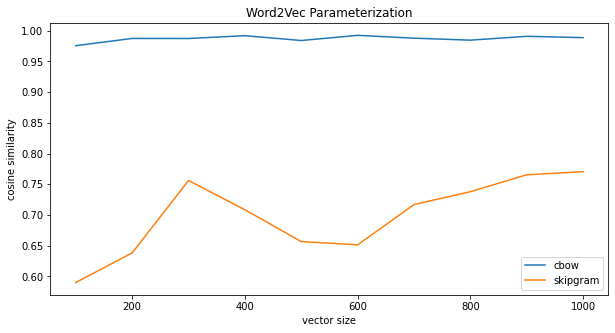

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax.plot(try_dims, cs_mod1, label = 'cbow')
ax.plot(try_dims, cs_mod2, label = 'skipgram')
ax.set_xlabel('vector size') # add an x-label to the axes
ax.set_ylabel('cosine similarity') # add a y-label to the axes
ax.set_title('Word2Vec Parameterization') # add a title to the axes
ax.legend() # add a legend
plt.show()

In [41]:
# top 10 words most similar to given word
model1.wv.most_similar('alice')

[('very', 0.9996967911720276),
 ('that', 0.9996825456619263),
 ('it', 0.9996784925460815),
 ('then', 0.9996765851974487),
 ('he', 0.9996645450592041),
 ('as', 0.9996613264083862),
 ('and', 0.9996586441993713),
 ('so', 0.9996563792228699),
 ('not', 0.9996546506881714),
 ('be', 0.9996539950370789)]

In [43]:
model1.wv.most_similar('rabbit')

[(':', 0.9996107220649719),
 ('and', 0.9996071457862854),
 ('a', 0.9995983839035034),
 ('at', 0.9995937943458557),
 ('about', 0.9995865821838379),
 ('of', 0.9995675683021545),
 ('with', 0.9995655417442322),
 ('out', 0.9995612502098083),
 ('.', 0.9995606541633606),
 ('then', 0.9995529055595398)]

In [44]:
model2.wv.most_similar('alice')

[('thought', 0.9891118407249451),
 ('hatter', 0.9839142560958862),
 ('duchess', 0.9811038970947266),
 ('cat', 0.9803930521011353),
 ('well', 0.9803516268730164),
 ('”', 0.9797637462615967),
 ('herself', 0.9794520139694214),
 ('very', 0.9790695309638977),
 ('said', 0.9782736301422119),
 ('king', 0.977584183216095)]

In [45]:
model2.wv.most_similar('rabbit')

[('last', 0.9962745308876038),
 ('voice', 0.9958359003067017),
 ('over', 0.995801568031311),
 ('round', 0.9953614473342896),
 ('began', 0.9950187802314758),
 ('looking', 0.9949074387550354),
 ('ran', 0.993661642074585),
 ('took', 0.9933592677116394),
 ('white', 0.9930416941642761),
 ('way', 0.9929876923561096)]

## Analogies
The famous examples that show an incredible property of embeddings is the concept of analogies. We can add and subtract word embeddings and arrive at interesting results. 

In [57]:
# Using the Gensim library in python, we can add and subtract word vectors, and it would find the most similar words to the resulting vector. The image shows a list of the most similar words, each with its cosine similarity.
model1.wv.most_similar(positive=['rabbit','wonderland'], negative=['alice'])

[('end', 0.9906415343284607),
 ('adventures', 0.9891754388809204),
 ('associated', 0.9867567420005798),
 ('[', 0.9857655167579651),
 ('ebook', 0.9852861762046814),
 (']', 0.9820349216461182),
 ('provide', 0.9810984134674072),
 ('curious', 0.9808325171470642),
 ('full', 0.9806168079376221),
 ('permission', 0.9805628657341003)]